In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

In [ ]:
data = pd.read_csv('data.csv')

In [ ]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
data.shape

(2200, 8)

In [ ]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
data.label.value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

## Determining the min, max and mean values of every single feature based on the crop

In [ ]:
@interact
def summary(crops = list(data.label.value_counts().index)):
  x = data[data.label == crops]
  for y in list(data.columns.drop('label')):
    print("Maximum value of {}: {}".format(y, np.round(x[y].max(),2)))
    print("Minimum value of {}: {}".format(y, np.round(x[y].min(),2)))
    print("Average value of {}: {}".format(y, np.round(x[y].mean(),2)))
    print('-----------------------------------------')


interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

## Average values for every crop

In [ ]:
@interact
def compare(conditions = list(data.columns.drop('label'))):
  print("Average values for ", conditions, " is {0:.2f}".format(data[conditions].mean()))
  print('\n')
  for x in list(data.label.value_counts().index):
    print("Average value for {}: {}".format(x, np.round(data[data.label == x][conditions].mean(),2)))
    print('------------------------------------------')

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

## Separating the crops based by comparing them with the average values

In [ ]:
@interact
def comparison(categories = list(data.columns.drop('label'))):
  crops_greater = []
  crops_lower = []
  for x in list(data.label.value_counts().index):
    if(data[data.label == x][categories].mean() > data[categories].mean()):
      crops_greater.append(x)
    else:
      crops_lower.append(x)
  print('Crops with values greater than the average: ', crops_greater)
  print('\n')
  print('Crops with values lower than the average: ', crops_lower)    

interactive(children=(Dropdown(description='categories', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

## Distribution

In [ ]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

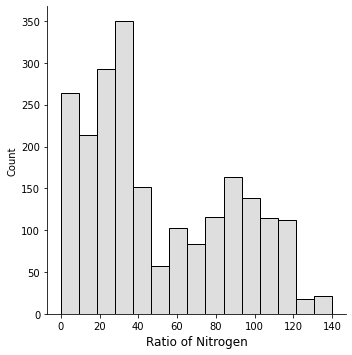

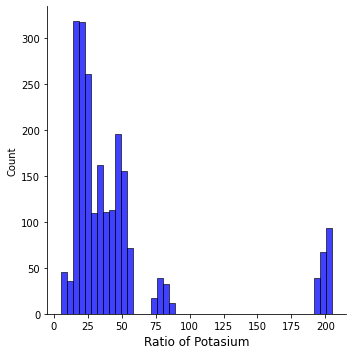

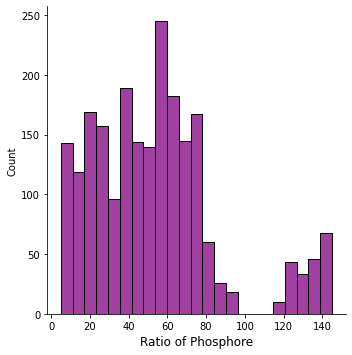

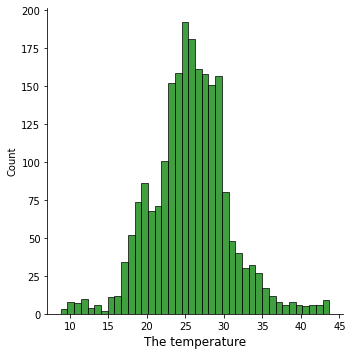

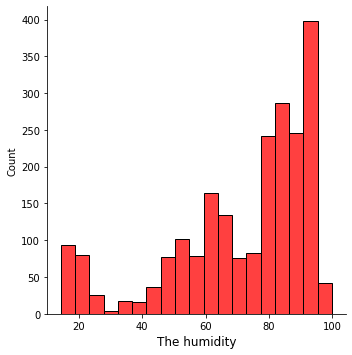

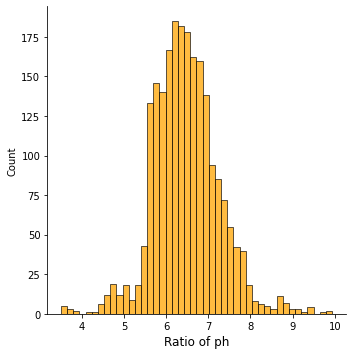

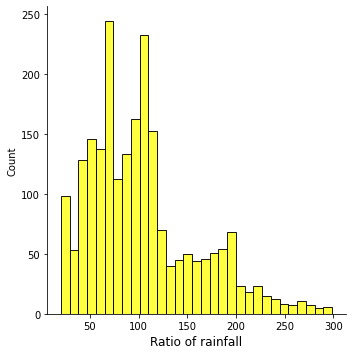

In [ ]:
plt.rcParams['figure.figsize'] = (15, 7)

sns.displot(data['N'], color = 'lightgrey')
plt.xlabel('Ratio of Nitrogen', fontsize = 12)
plt.show()


sns.displot(data['K'], color = 'blue')
plt.xlabel('Ratio of Potasium', fontsize = 12)
plt.show()


sns.displot(data['P'], color = 'purple')
plt.xlabel('Ratio of Phosphore', fontsize = 12)
plt.show()


sns.displot(data['temperature'], color = 'green')
plt.xlabel('The temperature', fontsize = 12)
plt.show()


sns.displot(data['humidity'], color = 'red')
plt.xlabel('The humidity', fontsize = 12)
plt.show()


sns.displot(data['ph'], color = 'orange')
plt.xlabel('Ratio of ph', fontsize = 12)
plt.show()


sns.displot(data['rainfall'], color = 'yellow')
plt.xlabel('Ratio of rainfall', fontsize = 12)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
x = data.loc[:, list(data.columns.drop('label'))]
x = pd.DataFrame(x)
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


### Using the elbow method to determine the optimal number of clusters

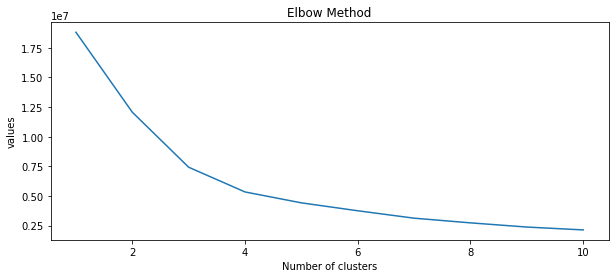

In [ ]:
plt.rcParams['figure.figsize'] = (10, 4)
val = []
for i in range(1, 11):
  km = KMeans(n_clusters=i, init = 'k-means++', max_iter=300, n_init=10, random_state=0)
  km.fit(x)
  val.append(km.inertia_)

plt.plot(range(1, 11), val)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('values')
plt.show()

In [ ]:
km = KMeans(n_clusters = 4, init='k-means++', n_init = 10, max_iter=300, random_state = 0)
y_means = km.fit_predict(x)
a = data.label
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0 : 'cluster'})

In [ ]:
print('Crops that belong to cluster 0: ', z[z.cluster == 0]['label'].unique(), '\n')
print('Crops that belong to cluster 1: ', z[z.cluster == 1]['label'].unique(), '\n')
print('Crops that belong to cluster 2: ', z[z.cluster == 2]['label'].unique(), '\n')
print('Crops that belong to cluster 3: ', z[z.cluster == 3]['label'].unique(), '\n')

Crops that belong to cluster 0:  ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut'] 

Crops that belong to cluster 1:  ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee'] 

Crops that belong to cluster 2:  ['grapes' 'apple'] 

Crops that belong to cluster 3:  ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee'] 



## Using Logistic Regression to predict most suitable crops according to climate and soil conditions

In [ ]:
from sklearn.model_selection import train_test_split
y = data['label']
x = data.drop(['label'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    